# Import

In [23]:
import os 
import sys
import pandas as pd

In [49]:
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\ML and DS Files\Kifiya AI\Kaim-week-2\notebooks
c:\ML and DS Files\Kifiya AI\Kaim-week-2


In [60]:
from importlib import reload
import scripts.data_loader, scripts.clean_and_transform, scripts.analysis_1, scripts.visualization
reload(scripts.data_loader)
reload(scripts.clean_and_transform)
reload(scripts.analysis_1)
reload(scripts.visualization)

<module 'scripts.visualization' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-2\\scripts\\visualization.py'>

In [61]:
from scripts.data_loader import DataLoader
from scripts.clean_and_transform import DropNullRows, NullValueFiller
from scripts.analysis_1 import UserSessionAggregator, DataDescriber, VariableTransformer, MetricsAnalyzer, DispersionAnalyzer, PCAAnalyzer
from scripts.visualization import UnivariateAnalyzer, BivariateAnalyzer, CorrelationAnalyzer

#  Load data

In [27]:
file_path = r"C:\ML and DS Files\Kifiya AI\Kaim-week-2\Week 2 data\Data\Copy of Week2_challenge_data_source(CSV).csv"
loader = DataLoader(file_path)
data = loader.load_data()

Data successfully loaded from C:\ML and DS Files\Kifiya AI\Kaim-week-2\Week 2 data\Data\Copy of Week2_challenge_data_source(CSV).csv


In [28]:
data.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [29]:
data.shape

(150001, 55)

In [30]:
# drop null rows for the follwing columns
# Bearer Id, Start, End, IMSI, MSISDN/Number, IMEI,Last Location Name, Handset Manufacturer, Handset Type
dropper = DropNullRows(columns_to_check=['Bearer Id', 'Start', 'End', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Handset Manufacturer', 'Handset Type'])

# Drop rows where the specified column has null values
data = dropper.drop_if_null(data)

Sucessfuly dropped null rows from ['Bearer Id', 'Start', 'End', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']


In [31]:
data.shape

(148346, 55)

In [32]:
null_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
           'DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 
           'UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
            'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
            'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B',
            'Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']


#  Numerical null values are filled based on the outlier and normal distribution

In [33]:
# Initialize the NullValueFiller class
filler = NullValueFiller(data, null_columns)
    
# Fill null values based on mean/median decision
filler.fill_nulls()

print("\nUpdated DataFrame:")
print(data)

c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 120748.
  res = hypotest_fun_out(*samples, **kwds)
c:\ML and DS Files\Kifiya AI\Kaim-week-2\scripts\clean_and_transform.py:72: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(fill_value, inplace=True)
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.sh

Column 'Avg RTT DL (ms)': Filled null values with median.
Column 'Avg RTT UL (ms)': Filled null values with median.
Column 'TCP DL Retrans. Vol (Bytes)': Filled null values with median.
Column 'TCP UL Retrans. Vol (Bytes)': Filled null values with median.
Column 'DL TP < 50 Kbps (%)': Filled null values with median.
Column '50 Kbps < DL TP < 250 Kbps (%)': Filled null values with median.
Column '250 Kbps < DL TP < 1 Mbps (%)': Filled null values with median.
Column 'DL TP > 1 Mbps (%)': Filled null values with median.
Column 'UL TP < 10 Kbps (%)': Filled null values with median.
Column '10 Kbps < UL TP < 50 Kbps (%)': Filled null values with median.
Column '50 Kbps < UL TP < 300 Kbps (%)': Filled null values with median.
Column 'UL TP > 300 Kbps (%)': Filled null values with median.
Column 'HTTP DL (Bytes)': Filled null values with median.


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 147581.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 67289.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 66934.
  res = hypotest_fun_out(*samples, **kwds)


Column 'HTTP UL (Bytes)': Filled null values with median.
Column 'Nb of sec with 125000B < Vol DL': Filled null values with median.
Column 'Nb of sec with 1250B < Vol UL < 6250B': Filled null values with median.
Column 'Nb of sec with 31250B < Vol DL < 125000B': Filled null values with median.
Column 'Nb of sec with 37500B < Vol UL': Filled null values with median.
Column 'Nb of sec with 6250B < Vol DL < 31250B': Filled null values with median.
Column 'Nb of sec with 6250B < Vol UL < 37500B': Filled null values with median.


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51673.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56174.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 55468.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19546.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\z_user\anaconda3\envs\z_env

Column 'Nb of sec with Vol DL < 6250B': Filled null values with median.
Column 'Nb of sec with Vol UL < 1250B': Filled null values with median.

Updated DataFrame:
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149995  1.304243e+19   4/29/2019 7:28     615.0   4/30/2019 0:01   407.0   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   


c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 147580.
  res = hypotest_fun_out(*samples, **kwds)


In [34]:
null_counts = data.isnull().sum()
print(null_counts)

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

## Task 1.1  Aggrigation

In [35]:
# Instantiate the class
aggregator = UserSessionAggregator(data)

# Perform aggregation by IMSI
aggrigated = aggregator.aggregate_per_user(user_column='IMSI')

# View results
aggrigated.head(3)

,IMSI,xdr_sessions,total_session_duration,total_dl_data,total_ul_data,total_social_media_data,total_google_data,total_email_data,total_youtube_data,total_netflix_data,total_gaming_data,total_other_data,total_application_data_volume
0,2.040471e+14,1,869844.0,78697597.0,60456049.0,1500145.0,5985089.0,2518425.0,18980320.0,21621336.0,28092282.0,389159720.0,467857317.0
1,2.040808e+14,1,877385.0,194828056.0,37295915.0,668596.0,8572779.0,842279.0,9839889.0,10340908.0,164563605.0,467678100.0,662506156.0
2,2.082001e+14,1,86019.0,31376981.0,53794658.0,3073697.0,603691.0,3076735.0,5556563.0,15305361.0,3760934.0,500044526.0,531421507.0


In [36]:
aggrigated.shape

(106351, 13)

#### variable discription

In [37]:
# Describe variables
describer = DataDescriber(aggrigated)
variable_description = describer.describe_variables()
print(variable_description)

                         Variable DataType  \
0                            IMSI  float64   
1                    xdr_sessions    int64   
2          total_session_duration  float64   
3                   total_dl_data  float64   
4                   total_ul_data  float64   
5         total_social_media_data  float64   
6               total_google_data  float64   
7                total_email_data  float64   
8              total_youtube_data  float64   
9              total_netflix_data  float64   
10              total_gaming_data  float64   
11               total_other_data  float64   
12  total_application_data_volume  float64   

                                      Description  
0            Bearer Id: Unique session identifier  
1                       Start: Session start time  
2                           End: Session end time  
3     Dur. (ms): Session duration in milliseconds  
4                           IMSI: User identifier  
5         Total DL (Bytes): Total downloade

#### 

#### Segmentation

In [38]:
# Perform user segmentation and compute total data per decile
transformer = VariableTransformer(aggrigated)
decile_data = transformer.segment_users()
print(decile_data)

  decile_class  total_users  total_dl_data  total_ul_data  total_data_dl_ul
0     Decile 1        10636   4.974577e+12   4.483199e+11      5.422897e+12
1     Decile 2        10635   5.596830e+12   5.046752e+11      6.101505e+12
2     Decile 3        10635   5.913242e+12   5.356414e+11      6.448883e+12
3     Decile 4        11808   5.400366e+12   4.889342e+11      5.889300e+12
4     Decile 5         9462   4.835876e+12   4.385359e+11      5.274412e+12
5     Decile 6        10635   5.869448e+12   5.302591e+11      6.399707e+12
6     Decile 7        10635   5.614784e+12   5.033690e+11      6.118153e+12
7     Decile 8        10635   7.149663e+12   6.506766e+11      7.800340e+12
8     Decile 9        10635   8.512781e+12   7.682074e+11      9.280988e+12
9    Decile 10        10635   1.358530e+13   1.231391e+12      1.481669e+13


c:\ML and DS Files\Kifiya AI\Kaim-week-2\scripts\analysis_1.py:123: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = self.df.groupby('decile_class').agg(


#### Analyze basic metrics

In [39]:
# Analyze metrics
analyzer = MetricsAnalyzer(aggrigated)
basic_metrics = analyzer.analyze_metrics()
print(basic_metrics["metrics"])
print(basic_metrics["explanation"])

{'mean': {'IMSI': 208201580149660.03, 'xdr_sessions': 1.3948716984325489, 'total_session_duration': 146642.00725898205, 'total_dl_data': 634247598.4734511, 'total_ul_data': 57357338.08331844, 'total_social_media_data': 2503987.4895957727, 'total_google_data': 8022780.764336959, 'total_email_data': 2499224.1660257075, 'total_youtube_data': 16228568.555876296, 'total_netflix_data': 16218838.393386051, 'total_gaming_data': 588774199.1042303, 'total_other_data': 587471981.6883621, 'total_application_data_volume': 1221719580.1618133}, 'median': {'IMSI': 208201546188027.0, 'xdr_sessions': 1.0, 'total_session_duration': 103248.0, 'total_dl_data': 570780866.0, 'total_ul_data': 46820524.0, 'total_social_media_data': 2267015.0, 'total_google_data': 7260559.0, 'total_email_data': 2267378.0, 'total_youtube_data': 14616444.0, 'total_netflix_data': 14646345.0, 'total_gaming_data': 533023727.0, 'total_other_data': 530316281.0, 'total_application_data_volume': 1033274207.0}, 'std': {'IMSI': 1799515195

#### Dispersion analyzer

In [40]:
# Initialize the analyzer
analyzer = DispersionAnalyzer(aggrigated)

# Compute dispersion metrics
dispersion_metrics = analyzer.compute_dispersion()
print("Dispersion Metrics:\n", dispersion_metrics)

# Provide interpretation
interpretation = analyzer.interpret_dispersion(dispersion_metrics)
print("\nInterpretation:\n", interpretation)

Dispersion Metrics:
                                       Range          IQR      Variance  \
Variable                                                                 
IMSI                           4.205059e+12  761725533.0  3.238255e+20   
xdr_sessions                   1.700000e+01          1.0  6.507980e-01   
total_session_duration         1.854661e+07     100063.5  3.463965e+10   
total_dl_data                  8.147916e+09  492814572.5  2.162425e+17   
total_ul_data                  7.267105e+08   29467747.0  1.273502e+15   
total_social_media_data        4.274382e+07    2092605.0  3.565346e+12   
total_google_data              1.161062e+08    6629851.0  3.684210e+13   
total_email_data               3.360711e+07    2067002.0  3.605059e+12   
total_youtube_data             2.378830e+08   13486883.5  1.520819e+14   
total_netflix_data             1.994792e+08   13542350.5  1.519577e+14   
total_gaming_data              7.622033e+09  487896032.0  1.975512e+17   
total_other_data 

#### Graphical analysis

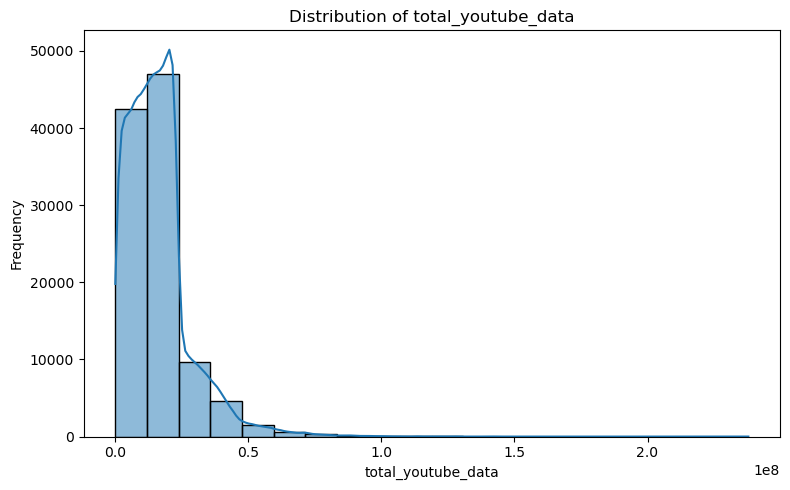

In [ ]:
uni_analyzer = UnivariateAnalyzer(aggrigated)
uni_analyzer.plot_variable(column='total_youtube_data')

In [53]:
aggrigated.columns

Index(['IMSI', 'xdr_sessions', 'total_session_duration', 'total_dl_data',
       'total_ul_data', 'total_social_media_data', 'total_google_data',
       'total_email_data', 'total_youtube_data', 'total_netflix_data',
       'total_gaming_data', 'total_other_data',
       'total_application_data_volume'],
      dtype='object')

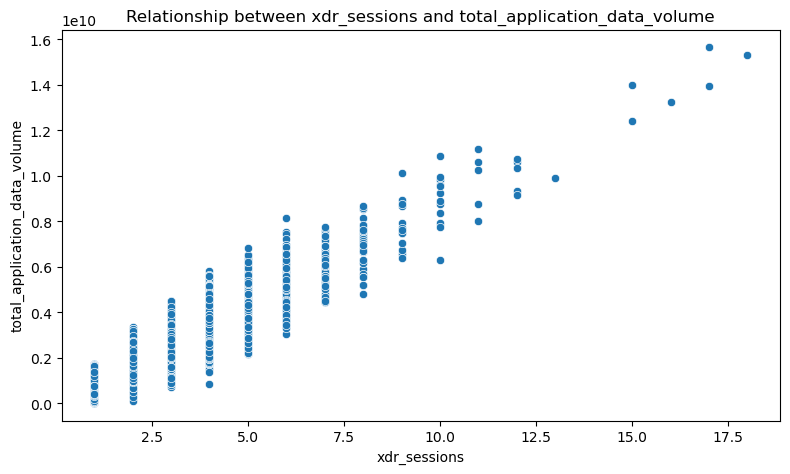

In [59]:
# Bivariate Analysis
bi_analyzer = BivariateAnalyzer(aggrigated)
bi_analyzer.plot_relationship(column_x='xdr_sessions', column_y='total_application_data_volume')